In [29]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
cwd = os.getcwd()
import matplotlib.animation as animation

In [11]:
#I used this dataset https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.html
#the full resolution one was giving me some error I couldn't figure out. 
#I think it just downloaded wrong, but maybe more than that
#also this one, much much smaller
file2read = netcdf.NetCDFFile(cwd+'/sst.wkmean.1990-present.nc','r')

In [12]:
file2read.variables.keys() 

dict_keys(['lat', 'lon', 'sst', 'time', 'time_bnds'])

In [20]:
sst  = file2read.variables['sst']
data = sst[:]*1

In [24]:
print(len(data))
print(data.shape)

1674
(1674, 180, 360)


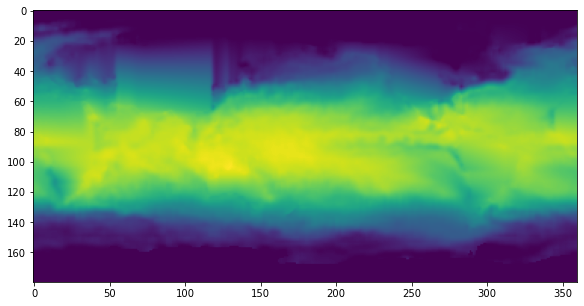

In [15]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(sst[0])

In [34]:
def animate(snapshots, normalize = True, file_name = "animation.gif"):
    """
    Makes an animation of snapshots in time
    
    inputs:
    snapshots: np.array of size (n_time_steps,1, dim, dim)
    normalize = True: whether to fix axis between 0 and 1 or not
    file_name = "animation.gif": file name of where to save gif
    
    outputs:
    no returned output
    gif saved to file_name
    """


    fps = 30
    nSeconds = len(snapshots)/fps
    
    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure()#( figsize=(8,8) )

    a = snapshots[0,:,:]
#     if normalize:
#         im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0.0, vmax=1.0)
#     else:
    im = plt.imshow(a, interpolation='none', aspect='auto', vmin=np.min(snapshots), vmax=np.max(snapshots))
    plt.colorbar()

    print("Animating, may take a little while...")

    def animate_func(i):
        if i % fps == 0:
            print( '.', end ='' )

        im.set_array(snapshots[i,:,:,])
        return [im]

    anim = animation.FuncAnimation(
                                   fig,
                                   animate_func,
                                   frames = int(nSeconds * fps),
                                   interval = 1000 / fps, # in ms
                                   )
    writergif = animation.PillowWriter(fps=30)
    anim.save(file_name, writer=writergif)

    print('Done! gif saved to ', file_name)


Animating, may take a little while...
.........................................................Done! gif saved to  wkmean.gif


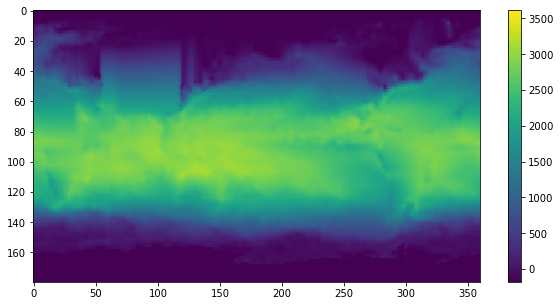

In [35]:
animate(data, normalize = False, file_name = "wkmean.gif")

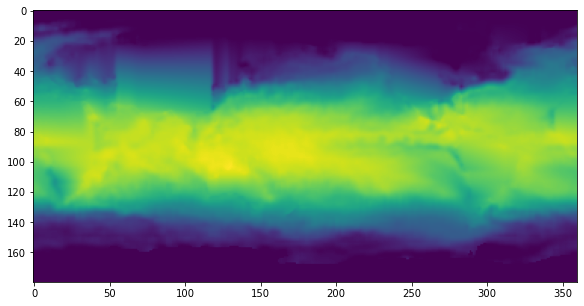

In [40]:
plt.imshow(data[])

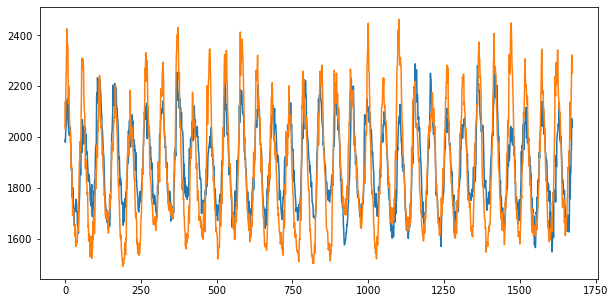

In [41]:
plt.plot(data[:,30,23])
plt.plot(data[:,123,230])

2806


In [2]:
# http://localhost:8888/edit/sst.day.mean.ltm.1991-2020.nc
file2read = netcdf.NetCDFFile(cwd+'sst_day_mean_1991_2020.nc','r')
temp = file2read.variables[var] # var can be 'Theta', 'S', 'V', 'U' etc..
data = temp[:]*1
file2read.close()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/16kat/OneDrive - acornonsite.com/Documents/Winter 2022/CSE 442sst_day_mean_1991_2020.nc'